In [1]:
#Necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score)

In [2]:
#load the cleaned CSV
df = pd.read_csv('../data/noshowappointments_cleaned.csv')
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_until_appointment,neighbourhood_freq
0,1,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,0,1,592
1,1,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,1,1,533
2,1,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,1,1,533
3,1,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,0,1,472
4,1,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,0,0,1,1186


In [3]:
df = df.drop(columns =['scheduledday','appointmentday'])

In [4]:
#target variable
y = df['no_show']

#Feature set
X = df.drop(columns =['no_show'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print("Target Distribution (Train):")
print(y_train.value_counts(normalize=True))

Train shape: (57567, 10)
Test shape: (14392, 10)
Target Distribution (Train):
no_show
0    0.714802
1    0.285198
Name: proportion, dtype: float64


In [5]:
# Initialize and train
baseline = LogisticRegression(max_iter=10000, solver='liblinear')  # liblinear is better for small/medium datasets
baseline.fit(X_train, y_train)

# Predict on test set
y_pred = baseline.predict(X_test)
y_proba = baseline.predict_proba(X_test)[:, 1]  # for roc-auc

In [6]:
#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10270    18]
 [ 4090    14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10288
           1       0.44      0.00      0.01      4104

    accuracy                           0.71     14392
   macro avg       0.58      0.50      0.42     14392
weighted avg       0.64      0.71      0.60     14392



In [7]:
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")



ROC-AUC Score: 0.5765


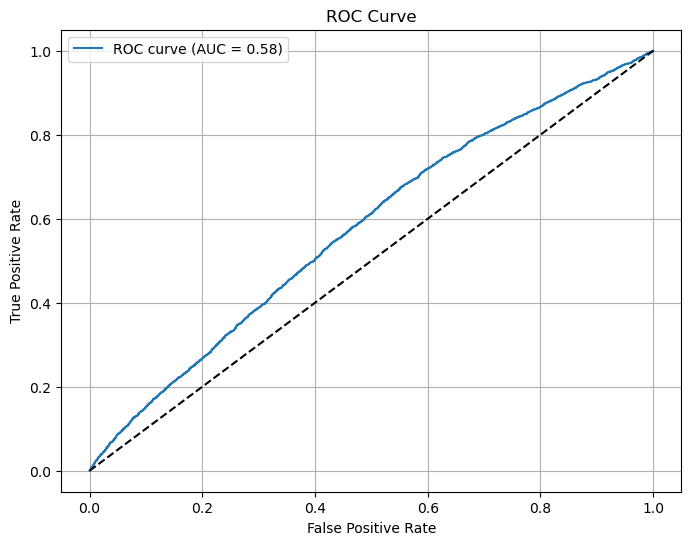

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Confusion Matrix:
[[5532 4756]
 [1751 2353]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63     10288
           1       0.33      0.57      0.42      4104

    accuracy                           0.55     14392
   macro avg       0.55      0.56      0.52     14392
weighted avg       0.64      0.55      0.57     14392


ROC-AUC Score: 0.5800


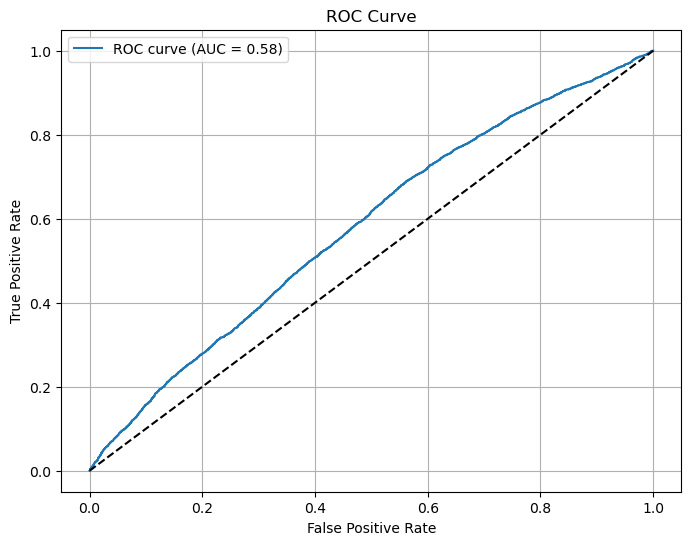

In [9]:
# Initialize and train
baseline2 = LogisticRegression(max_iter=10000, solver='liblinear', class_weight='balanced')  # liblinear is better for small/medium datasets
baseline2.fit(X_train, y_train)

# Predict on test set
y_pred = baseline2.predict(X_test)
y_proba = baseline2.predict_proba(X_test)[:, 1]  

#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Logistic Regression – Baseline Summary

 Model:
- Algorithm: Logistic Regression
- Settings:
  - Solver: `'liblinear'`
  - Max Iterations: `10000`
  - Class Weight: `'balanced'`



Evaluation:

- Accuracy: ~55%
- Precision (No-Show): 0.33
- Recall (No-Show): 0.57 
- F1-Score (No-Show): 0.42
- ROC-AUC Score: 0.58


Explanation:

- Applying `class_weight='balanced'` helped the model detect no-shows much better, increasing recall from `0.00` to `0.57`
- This is a trade-off — we accept more false positives in return for catching actual missed appointments
- The ROC-AUC shows weak but non-random classification — a reasonable baseline



In [10]:
import joblib

# Save the trained model
joblib.dump(baseline2, '../models/logreg_baseline.pkl')

['../models/logreg_baseline.pkl']

In [11]:
#Lets try some other models
#Random forest
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

ROC-AUC Score: 0.5763

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78     10288
           1       0.37      0.24      0.29      4104

    accuracy                           0.67     14392
   macro avg       0.55      0.54      0.54     14392
weighted avg       0.63      0.67      0.64     14392


Confusion Matrix:
 [[8656 1632]
 [3137  967]]


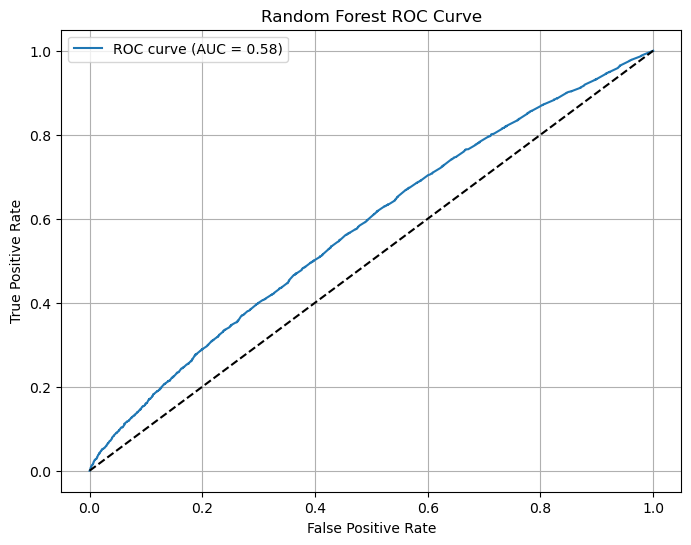

In [12]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", round(roc_score, 4))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_score_val = auc(fpr, tpr) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score_val:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [13]:
#tuned version (manually)
rf2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, n_estimators=200, n_jobs=-1,
                       random_state=42)

ROC-AUC Score: 0.6038

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68     10288
           1       0.36      0.54      0.43      4104

    accuracy                           0.59     14392
   macro avg       0.56      0.58      0.56     14392
weighted avg       0.65      0.59      0.61     14392


Confusion Matrix:
 [[6294 3994]
 [1885 2219]]


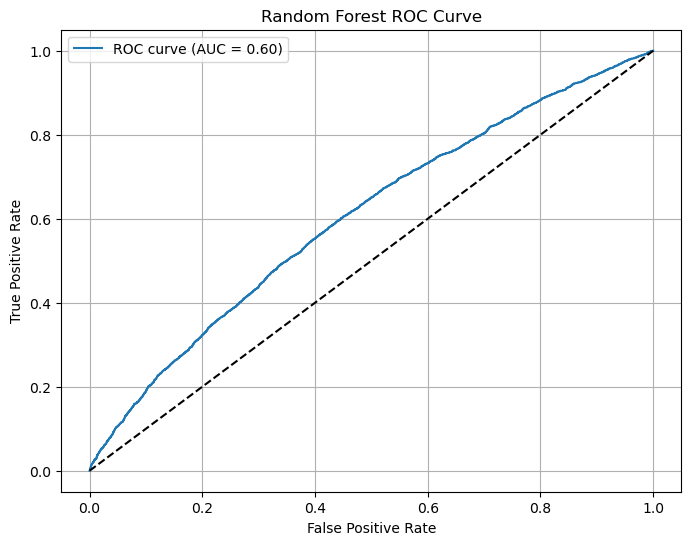

In [15]:
y2_pred = rf2.predict(X_test)
y2_proba = rf2.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y2_proba)
print("ROC-AUC Score:", round(roc_score, 4))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y2_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y2_pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y2_proba)
roc_auc_score_val = auc(fpr, tpr) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score_val:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid()
plt.show()

TRAIN SET EVALUATION
ROC-AUC (Train): 0.8068

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.86      0.74      0.79     41149
           1       0.52      0.71      0.60     16418

    accuracy                           0.73     57567
   macro avg       0.69      0.72      0.69     57567
weighted avg       0.76      0.73      0.74     57567


Confusion Matrix (Train):
 [[30275 10874]
 [ 4839 11579]]

TEST SET EVALUATION
ROC-AUC (Test): 0.6067

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.76      0.67      0.71     10288
           1       0.37      0.48      0.42      4104

    accuracy                           0.61     14392
   macro avg       0.57      0.58      0.56     14392
weighted avg       0.65      0.61      0.63     14392


Confusion Matrix (Test):
 [[6861 3427]
 [2117 1987]]


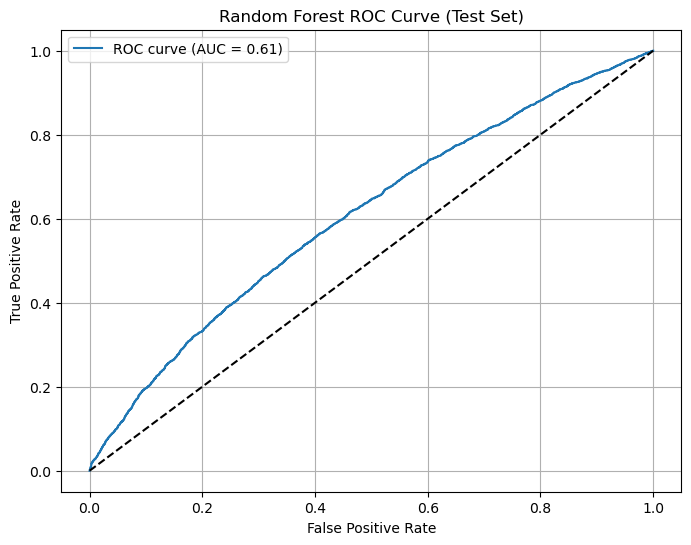

In [19]:
#Another one 
rf3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf3.fit(X_train,y_train)

# train set
print("TRAIN SET EVALUATION")

train_pred = rf3.predict(X_train)
train_proba = rf3.predict_proba(X_train)[:, 1]

print("ROC-AUC (Train):", round(roc_auc_score(y_train, train_proba), 4))
print("\nClassification Report (Train):\n", classification_report(y_train, train_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train, train_pred))

#test set
print("\nTEST SET EVALUATION")

test_pred = rf3.predict(X_test)
test_proba = rf3.predict_proba(X_test)[:, 1]

print("ROC-AUC (Test):", round(roc_auc_score(y_test, test_proba), 4))
print("\nClassification Report (Test):\n", classification_report(y_test, test_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, test_pred))

# roc test 
fpr, tpr, thresholds = roc_curve(y_test, test_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Test Set)')
plt.legend()
plt.grid()
plt.show()


### But overfitting, lest try Grid search

Starting Grid Search...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 500}
Best CV ROC-AUC Score: 0.6096

TRAIN SET EVALUATION
ROC-AUC (Train): 0.6695
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.80      0.63      0.71     41149
           1       0.40      0.61      0.48     16418

    accuracy                           0.63     57567
   macro avg       0.60      0.62      0.60     57567
weighted avg       0.69      0.63      0.64     57567

Confusion Matrix (Train):
 [[25965 15184]
 [ 6336 10082]]

TEST SET EVALUATION
ROC-AUC (Test): 0.6045
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.77      0.60      0.68     10288
           1       0.35      0.55      0.43      4104

    accuracy                           0.59     14392
   macro avg       0.56      0.57      0.55     1

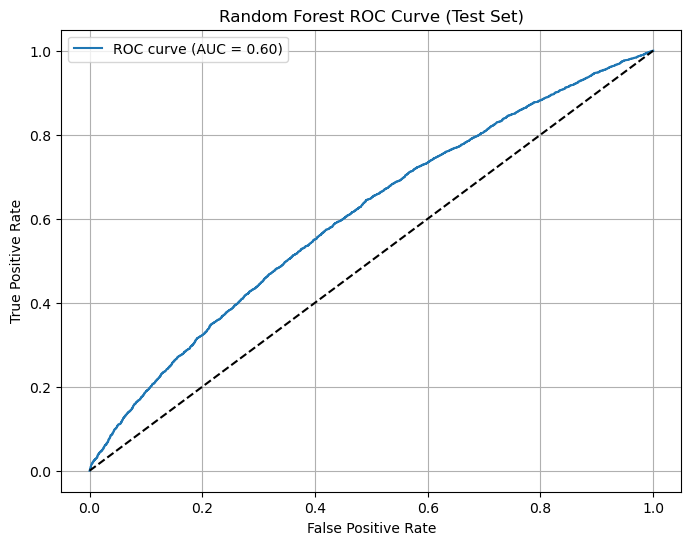

[CV] END ..max_depth=6, min_samples_leaf=2, n_estimators=300; total time=   4.1s
[CV] END ..max_depth=6, min_samples_leaf=6, n_estimators=300; total time=   4.7s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=300; total time=   5.9s
[CV] END .max_depth=10, min_samples_leaf=6, n_estimators=300; total time=   5.9s
[CV] END .max_depth=14, min_samples_leaf=2, n_estimators=100; total time=   2.3s
[CV] END .max_depth=14, min_samples_leaf=2, n_estimators=500; total time=  12.7s
[CV] END ..max_depth=6, min_samples_leaf=2, n_estimators=500; total time=   7.3s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=500; total time=   9.7s
[CV] END .max_depth=10, min_samples_leaf=6, n_estimators=500; total time=  10.2s
[CV] END .max_depth=14, min_samples_leaf=6, n_estimators=300; total time=   6.7s
[CV] END ..max_depth=6, min_samples_leaf=2, n_estimators=300; total time=   4.4s
[CV] END ..max_depth=6, min_

In [20]:
from sklearn.model_selection import GridSearchCV
# Step 1: Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 10, 14],
    'min_samples_leaf': [2, 6]
}

# Step 2: Set up base RandomForestClassifier
rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Step 3: Run GridSearchCV
grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("Starting Grid Search...")
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print(f"\nBest Parameters: {grid.best_params_}")
print(f"Best CV ROC-AUC Score: {grid.best_score_:.4f}")

# Step 4: Evaluate best model on train and test sets

## 🔹 Train Set Evaluation
print("\nTRAIN SET EVALUATION")

train_pred = best_rf.predict(X_train)
train_proba = best_rf.predict_proba(X_train)[:, 1]

print("ROC-AUC (Train):", round(roc_auc_score(y_train, train_proba), 4))
print("Classification Report (Train):\n", classification_report(y_train, train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, train_pred))

## 🔹 Test Set Evaluation
print("\nTEST SET EVALUATION")

test_pred = best_rf.predict(X_test)
test_proba = best_rf.predict_proba(X_test)[:, 1]

print("ROC-AUC (Test):", round(roc_auc_score(y_test, test_proba), 4))
print("Classification Report (Test):\n", classification_report(y_test, test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, test_pred))

# Step 5: Plot ROC Curve for Test Set
fpr, tpr, _ = roc_curve(y_test, test_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Test Set)')
plt.legend()
plt.grid()
plt.show()

In [21]:
#save model
joblib.dump(best_rf, '../models/rf_grid_best.pkl')


['../models/rf_grid_best.pkl']

In [22]:
import json, datetime, pathlib

results = {
    "timestamp": datetime.datetime.now().isoformat(),
    "model": "RandomForest (GridSearchCV)",
    "best_params": grid.best_params_,
    "roc_auc_test": roc_auc_score(y_test, test_proba),
    "recall_test": classification_report(y_test, test_pred, output_dict=True)["1"]["recall"],
    "precision_test": classification_report(y_test, test_pred, output_dict=True)["1"]["precision"],
    "f1_test": classification_report(y_test, test_pred, output_dict=True)["1"]["f1-score"]
}

pathlib.Path("../logs").mkdir(exist_ok=True)

with open("../logs/rf_gridsearch_log.json", "a") as f:
    f.write(json.dumps(results) + "\n")
